## Reto 6: Lo que los científicos aman

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - `merge`
        - Filtros con value_counts()
        - Agrupaciones y reordenamientos
    
---
    
### 2. Desarrollo:

#### a) Lo que los científicos aman

En este Reto vamos a obtener una lista de las películas que fueron mejor evaluadas por científicos para saber cuáles son sus favoritas. Vamos a realizar los siguientes pasos:

1. Lee los archivos para `movies`, `ratings` y `users`.
2. Agrega **solamente** la columna `occupation` al `DataFrame` `ratings`, para tener la información de las ocupaciones de los usuarios que realizaron los ratings.
3. Filtra tu tabla `ratings` para quedarte solamente con los ratings hechos por científicos.
4. Agrega **solamente** la columna `title` de la tabla `movies` a la tabla `ratings` para tener la información de los nombres de las películas que fueron evaluadas por científicos.
5. Filtra tu `DataFrame` para quedarte **solamente** con las películas que fueron evaluadas más de 50 veces.
6. Realiza una agrupación por película y computa el promedio de los ratings de cada película.
7. Ordena la `Serie` resultante descendentemente y asígnala  a la variable `mean_of_scientists_ratings_sorted`.

> **Nota**: el paso #5 es un poco complejo. No te desesperes si no encuentras una solución rápidamente. ¡Pídele a la experta que te guíe para que puedas resolverlo sin que te explote la cabeza!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importar pands
import pandas as pd

In [14]:
#leemos los archivos movies y ratings
movies = pd.read_csv('/content/drive/MyDrive/BEDU/movies.csv');
ratings = pd.read_csv('/content/drive/MyDrive/BEDU/ratings.csv');
users = pd.read_csv('/content/drive/MyDrive/BEDU/users.csv');
occupations = pd.read_csv('/content/drive/MyDrive/BEDU/occupations.csv');

In [11]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
users.head()

,user_id,gender,age,occupation,cp
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [17]:
users = pd.merge(users,occupations, left_on='occupation', right_on='occupations_id')

In [18]:
users.set_index('user_id',drop=True, inplace=True)

In [19]:
ratings_w_occupation = pd.merge(ratings, users[['ocupation']], left_on='user_id', right_index=True)

In [24]:
#cramos el filtro
scientist = ratings_w_occupation['ocupation'] == 'scientist'

In [26]:
#filtramos
scientist_ratings = ratings_w_occupation[scientist]

In [29]:
movies.columns = ['movies_id','title','clasification']
movies.set_index('movies_id',drop=True, inplace=True)

In [32]:
# hacemos merge de los dataframes
scientific_ratings_movies = pd.merge(scientist_ratings,movies['title'],left_on='movie_id',right_index=True)

In [34]:
df_cuantas_valoraciones = scientific_ratings_movies['movie_id'].value_counts()
filtro_mayor_50 = df_cuantas_valoraciones > 50

In [37]:
df_filtrado_mayor_50 = df_cuantas_valoraciones[filtro_mayor_50]

In [40]:
df_filtrado_mayor_50.head()

1196    88
260     85
2858    84
1197    75
1198    75
Name: movie_id, dtype: int64

In [51]:
df_filtrado_mayor_50.name = 'ratings'

In [52]:
df_filtrado_mayor_50.head()

1196    88
260     85
2858    84
1197    75
1198    75
Name: ratings, dtype: int64

In [53]:
scientific_ratings_movies.head()

,user_id,movie_id,rating,timestamp,ocupation,title
182,3,3421,4,978298147,scientist,Animal House (1978)
27556,193,3421,4,977019997,scientist,Animal House (1978)
61270,412,3421,5,976294231,scientist,Animal House (1978)
144084,929,3421,5,975192861,scientist,Animal House (1978)
176500,1116,3421,3,974913876,scientist,Animal House (1978)


In [55]:
#unimos las de mas de 50 y los ratings
min_50_movies = pd.merge(df_filtrado_mayor_50,scientific_ratings_movies, left_index=True, right_on='movie_id')


In [56]:
min_50_movies.columns

Index(['ratings', 'user_id', 'movie_id', 'rating', 'timestamp', 'ocupation',
       'title'],
      dtype='object')

In [59]:
#agrupamos por movie_id y sacamos la media del rating
media = min_50_movies.groupby('movie_id')['rating'].mean()

In [60]:
media.head()

movie_id
1      4.072727
110    4.262295
260    4.600000
296    4.271186
318    4.537037
Name: rating, dtype: float64

In [62]:
movies.head()

,title,clasification
movies_id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [72]:
#le agregams a la media el titulo de la pelicula

mean_of_scientists_ratings_sorted =pd.merge(media, movies['title'],left_index=True,right_index=True)

In [73]:
#cambiamos las columnas
mean_of_scientists_ratings_sorted.columns = ['rating','index']

In [75]:
#ponemos el titulo de la pelicula como indice
mean_of_scientists_ratings_sorted.set_index('index',drop=True,inplace=True)

In [80]:
mean_of_scientists_ratings_sorted.head()

,rating
index,
Toy Story (1995),4.072727
Braveheart (1995),4.262295
Star Wars: Episode IV - A New Hope (1977),4.600000
Pulp Fiction (1994),4.271186
"Shawshank Redemption, The (1994)",4.537037


In [84]:
type(mean_of_scientists_ratings_sorted.squeeze())

pandas.core.series.Series

In [85]:
#transformamos a serie
mean_of_scientists_ratings_sorted = mean_of_scientists_ratings_sorted.squeeze()

In [90]:
#rdenamos descendentemente
mean_of_scientists_ratings_sorted=mean_of_scientists_ratings_sorted.sort_values(ascending=False)

Pídele a tu experta la función de verificación `visualizar_lista` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado.

In [78]:
def visualizar_lista(mean_of_scientists_ratings_sorted):
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Ratings promedio de las películas más evaluadas por científicos')
    sns.barplot(x=mean_of_scientists_ratings_sorted, y=mean_of_scientists_ratings_sorted.index, ax=ax)
    ax.set(ylabel='Título', xlabel='Rating Promedio')

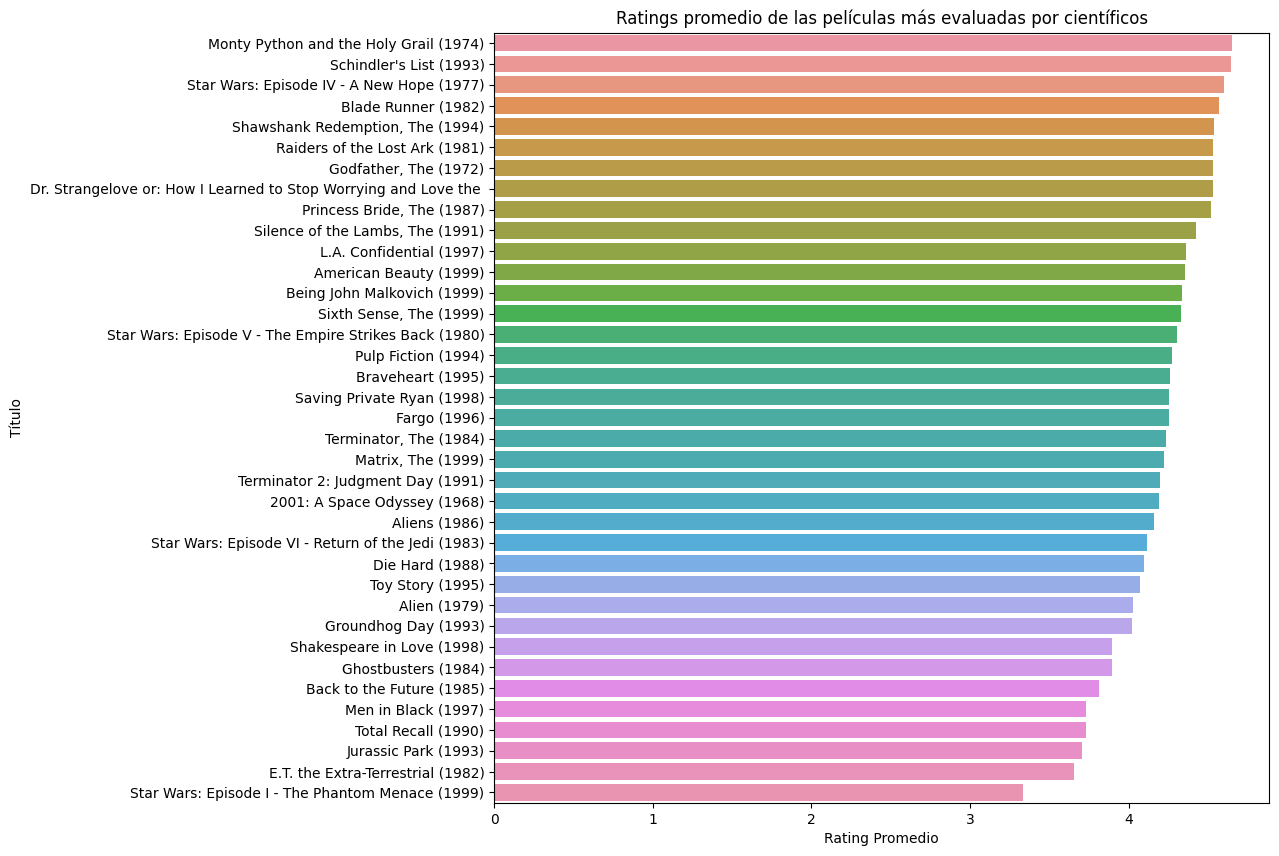

In [91]:
# Pega aquí la función de verificación

visualizar_lista(mean_of_scientists_ratings_sorted)

<details><summary>Solución</summary>

```python
movies = pd.read_csv('../../Datasets/MovieLens/movies-separated_by_money-raw.csv', sep='$', index_col=0)
ratings = pd.read_csv('../../Datasets/MovieLens/ratings-raw.csv')
users = pd.read_csv('../../Datasets/MovieLens/users-full.csv')
ratings_with_occupation = pd.merge(ratings, users['occupation'], left_on='user_id', right_index=True)
only_scientists = ratings_with_occupation[ratings_with_occupation['occupation'] == 'scientist']
only_scientist_with_movie_title = pd.merge(only_scientists, movies['title'], left_on='movie_id', right_index=True)
movies_that_appear_more_than_50_times_filter = only_scientist_with_movie_title['title'].value_counts() > 50
titles_of_movies_that_appear_more_than_50_times = only_scientist_with_movie_title['title'].value_counts()[movies_that_appear_more_than_50_times_filter].index
def title_is_in_list(list_of_titles, title):
    return title in list_of_titles
ratings_for_most_rated_movies = only_scientist_with_movie_title[only_scientist_with_movie_title['title'].apply(lambda x: title_is_in_list(titles_of_movies_that_appear_more_than_50_times, x))]
mean_of_scientist_ratings = ratings_for_most_rated_movies.groupby('title')['rating'].mean()
mean_of_scientists_ratings_sorted = mean_of_scientist_ratings.sort_values(ascending=False)
```
    
</details>